# Airbnb regression challenge

In this challenge, you will make a regression on the Airbnb dataset. The airbnb dataset for Paris can be downloaded [here](http://data.insideairbnb.com/france/ile-de-france/paris/2020-08-22/data/listings.csv.gz).

The aim of this challenge will be to predict the `price` column of the dataset.

# I. Data Exploration & Data Preparation

First, you will explore and prepare the data.

Follow at least the following steps:
- load the data with pandas
- have a look at some of the features, the missing data, the kind of data (categorical, quantitative, unstructured...)
- Are there duplicates?

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [2]:
# Load the data
df = pd.read_csv('listings.csv.gz')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20200822123310,2020-08-25,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://a0.muscache.com/pictures/09da057c-0120...,2827,https://www.airbnb.com/users/show/2827,Karine,2008-09-09,"Casablanca, Grand Casablanca, Morocco","Arrivée à Casablanca il y a 4 ans, je suis amo...",within a day,63%,100%,f,https://a0.muscache.com/im/pictures/user/17fe6...,https://a0.muscache.com/im/pictures/user/17fe6...,République,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Entrepôt,NaN,48.86993,2.36251,Entire loft,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Hot water"", ""Hangers"", ""Iron"", ""Heating"", ""H...",$125.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,30,60,90,365,2020-08-25,1,0,0,2019-01-02,2019-01-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,1,1,0,0,0.05
1,3109,https://www.airbnb.com/rooms/3109,20200822123310,2020-08-26,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, Île-de-France, France",NaN,NaN,NaN,33%,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,Alésia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Paris, Île-de-France, France",Observatoire,NaN,48.83349,2.31852,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Hot water"", ""Smart lock"", ""Hangers"", ""Iron"",...",$103.00,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,30,60,90,365,2020-08-26,9,1,0,2016-12-27,2019-10-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.20
2,4890,https://www.airbnb.com/rooms/4890,20200822123310,2020-08-23,Quiet Historic & Cute +Free Cruise,Stylish & Classic One bedroom apartment for up...,"Called ""Paris Next Great Neighborhood"" from Tr...",https://a0.muscache.com/pictures/b144894f-bc55...,6792,https://www.airbnb.com/users/show/6792,Jennifer Of Cobblestone,2009-01-16,"Paris, Île-de-France, France",I am the owner of Cobblestone Paris Rentals\r\...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/6792/profile_...,https://a0.muscache.com/im/users/6792/profile_...,Le Marais,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",t,t,"Paris, Ile-de-France, France",Temple,NaN,48.86409,2.35651,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Iron"", ""Host greets you"", ""Hangers"", ""Washer...",$89.00,4,120,4.0,4.0,120.0,120.0,4.0,120.0,NaN,t,7,7,27,28,2020-08-23,22,0,0,2011-11-22,2017-04-30,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,3,3,0,0,0.21
3,5396,https://www.airbnb.com/rooms/5396,

In [3]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.758100e+04,6.758100e+04,6.758100e+04,67571.000000,67571.000000,0.0,67581.000000,67581.000000,67581.000000,0.0,53623.000000,67016.000000,67581.000000,6.758100e+04,67579.000000,67579.000000,6.757900e+04,6.757900e+04,67579.000000,6.757900e+04,0.0,67581.000000,67581.000000,67581.000000,67581.000000,67581.000000,67581.000000,67581.000000,51110.000000,51065.000000,51075.000000,51049.000000,51069.000000,51050.000000,51048.000000,67581.000000,67581.000000,67581.000000,67581.000000,52320.000000
mean,2.382767e+07,2.020082e+13,8.662812e+07,12.452457,12.452457,NaN,48.864144,2.345286,3.063835,NaN,1.376779,1.679987,5.564404,8.533308e+02,5.438613,6.228118,9.623702e+04,2.233667e+05,5.933077,2.230602e+05,NaN,8.605895,18.141549,28.368210,100.610467,19.406061,4.044569,0.195824,92.791313,9.578537,9.181419,9.659974,9.700464,9.678492,9.248276,8.534603,8.128483,0.241118,0.019547,0.808602
std,1.372353e+07,0.000000e+00,1.015256e+08,72.450451,72.450451,NaN,0.018397,0.033515,1.592007,NaN,0.938503,1.281361,43.870499,3.847155e+04,43.783489,46.971239,1.430802e+07,2.185517e+07,45.886793,2.182648e+07,NaN,11.958586,24.421069,37.362485,136.784454,41.171005,9.337078,0.900630,8.989564,0.851008,1.118161,0.795372,0.763754,0.693111,0.952630,35.763195,35.785211,1.080840,0.331515,1.100669
min,2.577000e+03,2.020082e+13,2.626000e+03,0.000000,0.000000,NaN,48.812540,2.221510,0.000000,NaN,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.199885e+07,2.020082e+13,1.247051e+07,1.000000,1.000000,NaN,48.850840,2.324010,2.000000,NaN,1.000000,1.000000,1.000000,3.000000e+01,1.000000,2.000000,3.100000e+01,4.500000e+01,2.000000,4.000000e+01,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.160000
50%,2.406054e+07,2.020082e+13,3.740520e+07,1.000000,1.000000,NaN,48.865360,2.348270,2.000000,NaN,1.000000,1.000000,2.000000,1.125000e+03,2.000000,3.000000,1.125000e+03,1.125000e+03,2.900000,1.125000e+03,NaN,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,0.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.430000
75%,3.652340e+07,2.020082e+13,1.335152e+08,2.000000,2.000000,NaN,48.879110,2.370570,4.000000,NaN,2.000000,2.000000,4.000000,1.125000e+03,4.000000,4.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,22.000000,46.000000,73.000000,180.000000,19.000000,4.000000,0.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,1.010000
max,4.507072e+07,2.020082e+13,3.636776e+08,1111.000000,1111.000000,NaN,48.905110,2.467440,16.000000,NaN,50.000000,90.000000,9999.000000,1.000000e+07,9999.000000,9999.000000,2.147484e+09,2.147484e+09,9999.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,841.000000,603.000000,55.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,316.0

In [4]:
# There are a lot of missing values
df.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               64
description                                      1359
neighborhood_overview                           26283
picture_url                                         1
host_id                                             0
host_url                                            0
host_name                                          10
host_since                                         10
host_location                                     153
host_about                                      32121
host_response_time                              40131
host_response_rate                              40131
host_acceptance_rate                            24037
host_is_superhost                                  10
host_thumbnail_url          

In [5]:
# There is no duplicate
df.duplicated().sum()

0

Also display some plots, e.g.:
- Plot the distribution of the prices (warning, the data format might need some processing with pandas)
- Plot a heatmap (or a bubble chart) of the geolocation of apartments with price in false color (or bubble size) using `plt.scatter()`.
- Plot correlation of the price to the number of beds: do you see any outlier?

In [6]:
import matplotlib.pyplot as plt
# Let's plot the price distribution, but first let's handle price issue
df['price'] = df['price'].str[1:].str.replace(',', '').astype(float)

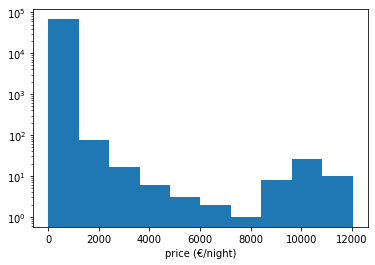

In [7]:
# It seems we have some outlier with prices above 10k€/night
# Most of them does not seem to be worth 10k€ per night
plt.hist(df['price'], log=True)
plt.xlabel('price (€/night)')
plt.show()

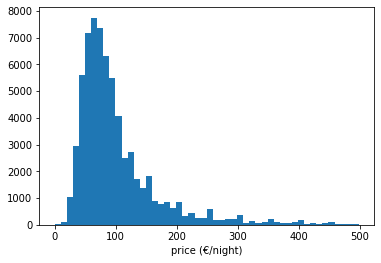

In [10]:
# Let's have a look at apartments below 500€/night only
plt.hist(df[df['price']<500]['price'], log=False, bins=50)
plt.xlabel('price (€/night)')
plt.show()

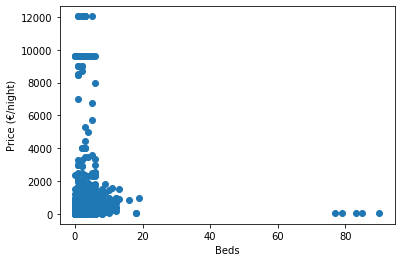

In [11]:
# We can have a look at the number of bedrooms as a function of price
plt.scatter(df['beds'], df['price'])
plt.xlabel('Beds')
plt.ylabel('Price (€/night)')
plt.show()

> Considering the goal is to predict price for standard apartments, we could remove all places with more than 8 beds and 500€/night

In [12]:
df_small = df[df['price'] < 500]
df_small = df_small[df_small['beds'] < 8]

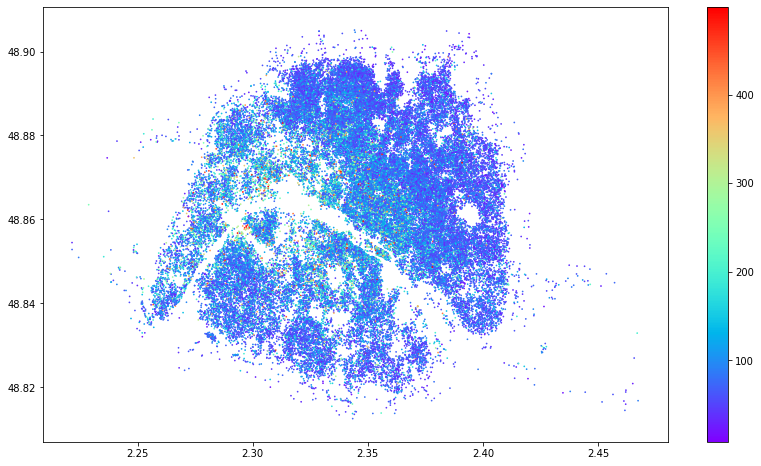

In [13]:
# Plot the heatmap of prices
plt.figure(figsize=(14, 8))
plt.scatter(df_small['longitude'], df_small['latitude'], 
            c=df_small['price'], s=0.5, cmap='rainbow')
plt.colorbar()
plt.show()

In [14]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

Prepare your data:
- Choose the features you want to use
- Split the data
- Prepare the data (both qualitative and quantitative features)

In [16]:
features = ['beds', 'latitude', 'longitude', 'host_is_superhost', 
            'property_type', 'instant_bookable', 'minimum_nights', 'maximum_nights',
            'number_of_reviews', 'number_of_reviews_l30d', 'number_of_reviews_ltm']
X = df_small[features]
y = df_small['price']

In [17]:
X.isna().sum()

beds                       0
latitude                   0
longitude                  0
host_is_superhost         10
property_type              0
instant_bookable           0
minimum_nights             0
maximum_nights             0
number_of_reviews          0
number_of_reviews_l30d     0
number_of_reviews_ltm      0
dtype: int64

We have missing values for `'host_is_superhost'` only. Let's investigate quickly:

In [19]:
X[X['host_is_superhost'].isna()]

,beds,latitude,longitude,host_is_superhost,property_type,instant_bookable,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_l30d,number_of_reviews_ltm
8326,1.0,48.87250,2.37467,NaN,Entire apartment,f,1,1125,0,0,0
8473,3.0,48.87116,2.38245,NaN,Entire apartment,f,7,57,0,0,0
8972,1.0,48.87326,2.37430,NaN,Entire apartment,f,1,1125,0,0,0
10155,2.0,48.88855,2.30527,NaN,Entire apartment,f,3,1125,0,0,0
11733,4.0,48.86556,2.39170,NaN,Entire condominium,f,1,1125,0,0,0
11936,1.0,48.85482,2.35554,NaN,Entire apartment,f,3,1125,0,0,0
12831,2.0,48.87051,2.28946,NaN,Entire apartment,f,3,8,0,0,0
26138,1.0,48.86160,2.37500,NaN,Entire apartment,f,3,1125,3,0,0
26724,2.0,48.86103,2.37228,NaN,Entire apartment,f,2,1125,0,0,0
48968,1.0,48.85151,2.31818,NaN,Entire apartment,t,2,20,20,0,13


> Most of them have no review at all, we can quite safely set them all to false: they are no superhost

Then we can safely do it before the split:

In [20]:
X['host_is_superhost'] = X['host_is_superhost'].fillna('f')

/home/vince/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
# Let's split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((52755, 11), (13189, 11), (52755,), (13189,))

In [22]:
# Prepare the quantative data
from sklearn.preprocessing import StandardScaler
quant_feats = ['beds', 'latitude', 'longitude', 'minimum_nights', 'maximum_nights',
               'number_of_reviews', 'number_of_reviews_l30d', 'number_of_reviews_ltm']
X_train_quant = X_train[quant_feats]
X_test_quant = X_test[quant_feats]
scaler = StandardScaler()
X_train_quant = scaler.fit_transform(X_train_quant)
X_test_quant = scaler.transform(X_test_quant)

In [23]:
# Let's prepare qualitative data
X_train_qual = X_train.drop(columns=quant_feats)
X_test_qual = X_test.drop(columns=quant_feats)
X_train_qual = pd.get_dummies(X_train_qual, drop_first=True)
X_test_qual = pd.get_dummies(X_test_qual, drop_first=True)

In [24]:
# We do not have the same number of dimensions: let's have a look
X_train_qual.shape, X_test_qual.shape

((52755, 56), (13189, 48))

In [25]:
# Handle the missing columns in test
missing_cols_test = set(X_train_qual.columns) - set(X_test_qual.columns)
# Add zeros for those columns
for c in missing_cols_test:
    X_test_qual[c] = 0

In [26]:
# Handle the missing columns in train
missing_cols_train = set(X_test_qual.columns) - set(X_train_qual.columns)
# Add zeros for those columns
for c in missing_cols_train:
    X_train_qual[c] = 0

In [27]:
# We do not have the same number of dimensions: let's have a look
X_train_qual.shape, X_test_qual.shape

((52755, 63), (13189, 63))

In [28]:
# Concatenate both quanti and quali features
X_train = np.concatenate([X_train_quant, X_train_qual], axis=1)
X_test = np.concatenate([X_test_quant, X_test_qual], axis=1)

# II. Model Training and Optimization

First, you have to select an evaluation metric. Pick one among the regression metrics you know.

Select a model and train it. Do not forget to use gridsearch with cross validation to optimize the hyperparameters of your model.

There are several regression models available on scikit-learn, among them:
- linear regression
- ridge regression
- LASSO
- PLS regression (not seen in the course, but you can have a look)

Feel free to try all the models you want.

In [29]:
# Let's try to use an regression with Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

grid_params = {'n_estimators': [10, 30],
               'max_depth': [3, 5]}

grid = GridSearchCV(GradientBoostingRegressor(),
                    grid_params,
                    cv=5,
                    scoring='neg_mean_squared_error',
                    return_train_score=True)

grid.fit(X_train, y_train)
print('best score', grid.best_score_)
print('best hyperparams', grid.best_params_)

best score -2719.7617612138756
best hyperparams {'max_depth': 5, 'n_estimators': 30}


# III. Evaluate your model

Finally evaluate your model on the test dataset.

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = grid.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.35391986696786193
MSE: 2960.6799257914927
RMSE: 54.41213031844547


> Having a RMSE of 54 means we are, on average, wrong of 54€/night: there is clearly room for improvement